2016년부터 20년까지 데이터를 쌓아보자.

In [1]:
import pandas as pd

In [2]:
year = [16,17,18,19,20]
for i in year:
    globals()['df_raw{}'.format(i)] = pd.read_csv("datasets/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_20{}.csv".format(i))

In [3]:
def col_name_kr(df):
    df.rename(columns={'G_ID':'게임키'}, inplace =True)
    df.rename(columns={'GDAY_DS':'일자'}, inplace =True)
    df.rename(columns={'T_ID':'팀코드'}, inplace =True)
    df.rename(columns={'VS_T_ID':'상대팀코드'}, inplace =True)
    df.rename(columns={'HEADER_NO':'더블헤더코드'}, inplace =True)
    df.rename(columns={'TB_SC' :'초말'}, inplace =True)
    df.rename(columns={'PA':'타자'}, inplace =True)
    df.rename(columns={'AB':'타수'}, inplace =True)
    df.rename(columns={'RBI':'타점'}, inplace =True)
    df.rename(columns={'RUN':'득점'}, inplace =True)
    df.rename(columns={'HIT':'안타'}, inplace =True)
    df.rename(columns={'H2':'2루타'}, inplace =True)
    df.rename(columns={'H3':'3루타'}, inplace =True)
    df.rename(columns={'HR':'홈런'}, inplace =True)
    df.rename(columns={'SB':'도루'}, inplace =True)
    df.rename(columns={'CS':'도루실패'}, inplace =True)
    df.rename(columns={'SH' :'희생타'}, inplace =True)
    df.rename(columns={'SF':'희생플라이'}, inplace =True)
    df.rename(columns={'BB':'4구'}, inplace =True)
    df.rename(columns={'IB':'고4'}, inplace =True)
    df.rename(columns={'HP':'사구'}, inplace =True)
    df.rename(columns={'KK':'삼진'}, inplace =True)
    df.rename(columns={'GD':'병살타'}, inplace =True)
    df.rename(columns={'ERR':'실책'}, inplace =True)
    df.rename(columns={'LOB':'잔루'}, inplace =True)
    df.rename(columns={'P_HRA_RT':'득점권타율'}, inplace =True)
    df.rename(columns={'P_AB_CN':'득점권타수'}, inplace =True)
    df.rename(columns={'P_HIT_CN' :'득점권안타'}, inplace =True)
    
def avg(df):
    df['1루타'] = df['안타'] - df['2루타']- df['3루타'] - df['홈런']
    df['타율'] = df['안타']/df['타수']
    df['득점권타율'] = df['득점권안타']/df['득점권타수']
    

def accum_bat(df):
    df_mod = df.loc[:,'타자':]
    df_accum = []
    col = df.columns[6:]
    for i in range(len(df_mod)):
        if i == 0:
            df_accum.append(df_mod.values[i])
        else:
            df_accum.append(df_accum[i-1] + df_mod.values[i])
    df_accum = pd.DataFrame(df_accum, columns=col)
    
    #타율 드랍
    df_accum = df_accum.drop('득점권타율', axis=1)
    return df_accum

def date(df,df_new):
    #일자 컬럼 추가
    ser_date = pd.to_datetime(df['일자'], format='%Y%m%d',errors='ignore')
    ser_date_mod = ser_date.reset_index()
    df_new['일자']=ser_date_mod['일자']

def team_sep(df,team):
    df_new =df[df['팀코드']==team]
    return df_new

def per_fit(df):
    #타자부터 득점권안타까지 경기당 기록으로 change
    for i in range(len(df)):
        df.loc[i,:'득점권안타'] = df.loc[i,:'득점권안타']/(i+1)

def scale(df):
    from sklearn.preprocessing import MinMaxScaler
    scale_cols = list(df.columns[:-3])
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df[scale_cols])
    df[scale_cols] = scaled_df
    #일자, 타율, 득점권 타율 제외

함수 사용순서(예시, 더 정확한 것은 RNN타율.ipynb를 볼 것)
- col_name_kr(df_raw)
- df_LG = team_sep(df_raw,'LG')
- LG_accum = accum_bat(df_LG)
- avg(LG_accum)
- date(df_LG,LG_accum)
- per_fit(LG_accum)
- scale(LG_accum)

In [4]:
for i in year:
    col_name_kr(globals()['df_raw{}'.format(i)])

위 코드는 아래 코드와 같다.
- col_name_kr(df_raw16)
- col_name_kr(df_raw17)
- col_name_kr(df_raw18)
- col_name_kr(df_raw19)
- col_name_kr(df_raw20)

In [5]:
team = list(df_raw16['팀코드'][:10])

In [6]:
for i in year:
    for j in team:
        globals()['df_{0}{1}'.format(j,i)] = team_sep(globals()['df_raw{}'.format(i)],j)

#위 코드는 다음 50줄 코드와 같은 일을 한다.
df_LG16 = team_sep(df_raw16,'LG')
df_HH16 = team_sep(df_raw16,'HH')
df_NC16 = team_sep(df_raw16,'NC')
df_HT16 = team_sep(df_raw16,'HT')
df_SK16 = team_sep(df_raw16,'SK')
df_KT16 = team_sep(df_raw16,'KT')
df_WO16 = team_sep(df_raw16,'WO')
df_LT16 = team_sep(df_raw16,'LT')
df_SS16 = team_sep(df_raw16,'SS')
df_OB16 = team_sep(df_raw16,'OB')

df_LG17 = team_sep(df_raw17,'LG')
df_HH17 = team_sep(df_raw17,'HH')
df_NC17 = team_sep(df_raw17,'NC')
df_HT17 = team_sep(df_raw17,'HT')
df_SK17 = team_sep(df_raw17,'SK')
df_KT17 = team_sep(df_raw17,'KT')
df_WO17 = team_sep(df_raw17,'WO')
df_LT17 = team_sep(df_raw17,'LT')
df_SS17 = team_sep(df_raw17,'SS')
df_OB17 = team_sep(df_raw17,'OB')

df_LG18 = team_sep(df_raw18,'LG')
df_HH18 = team_sep(df_raw18,'HH')
df_NC18 = team_sep(df_raw18,'NC')
df_HT18 = team_sep(df_raw18,'HT')
df_SK18 = team_sep(df_raw18,'SK')
df_KT18 = team_sep(df_raw18,'KT')
df_WO18 = team_sep(df_raw18,'WO')
df_LT18 = team_sep(df_raw18,'LT')
df_SS18 = team_sep(df_raw18,'SS')
df_OB18 = team_sep(df_raw18,'OB')

df_LG19 = team_sep(df_raw19,'LG')
df_HH19 = team_sep(df_raw19,'HH')
df_NC19 = team_sep(df_raw19,'NC')
df_HT19 = team_sep(df_raw19,'HT')
df_SK19 = team_sep(df_raw19,'SK')
df_KT19 = team_sep(df_raw19,'KT')
df_WO19 = team_sep(df_raw19,'WO')
df_LT19 = team_sep(df_raw19,'LT')
df_SS19 = team_sep(df_raw19,'SS')
df_OB19 = team_sep(df_raw19,'OB')

df_LG20 = team_sep(df_raw20,'LG')
df_HH20 = team_sep(df_raw20,'HH')
df_NC20 = team_sep(df_raw20,'NC')
df_HT20 = team_sep(df_raw20,'HT')
df_SK20 = team_sep(df_raw20,'SK')
df_KT20 = team_sep(df_raw20,'KT')
df_WO20 = team_sep(df_raw20,'WO')
df_LT20 = team_sep(df_raw20,'LT')
df_SS20 = team_sep(df_raw20,'SS')
df_OB20 = team_sep(df_raw20,'OB')

In [7]:
for i in year:
    for j in team:
        globals()['{0}_accum{1}'.format(j,i)] = accum_bat(globals()['df_{0}{1}'.format(j,i)])

In [8]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,희생플라이,4구,고4,사구,삼진,병살타,실책,잔루,득점권타수,득점권안타
0,33.0,29.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,8.0,0.0,4.0,6.0,4.0,0.0
1,87.0,73.0,6.0,6.0,20.0,2.0,0.0,1.0,0.0,1.0,...,0.0,9.0,1.0,0.0,16.0,0.0,5.0,21.0,24.0,3.0
2,141.0,117.0,10.0,10.0,28.0,3.0,1.0,2.0,2.0,1.0,...,0.0,16.0,1.0,3.0,25.0,0.0,7.0,35.0,35.0,5.0
3,178.0,148.0,16.0,16.0,38.0,6.0,1.0,3.0,2.0,2.0,...,0.0,18.0,1.0,5.0,30.0,2.0,8.0,42.0,47.0,8.0
4,215.0,182.0,18.0,18.0,46.0,7.0,1.0,4.0,2.0,2.0,...,0.0,19.0,1.0,7.0,37.0,4.0,9.0,50.0,54.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5498.0,4877.0,670.0,722.0,1405.0,258.0,15.0,144.0,64.0,44.0,...,37.0,405.0,14.0,92.0,945.0,108.0,77.0,1043.0,1271.0,374.0
140,5534.0,4911.0,672.0,724.0,1413.0,258.0,16.0,146.0,64.0,44.0,...,37.0,406.0,14.0,93.0,955.0,109.0,78.0,1050.0,1277.0,374.0
141,5571.0,4943.0,672.0,725.0,1421.0,259.0,16.0,146.0,64.0,44.0,...,37.0,410.0,14.0,94.0,964.0,112.0,80.0,1059.0,1284.0,374.0
142,5610.0,4978.0,676.0,729.0,1430.0,259.0,16.0,148.0,64.0,44.0,...,38.0,413.0,14.0,94.0,968.0,112.0,80.0,1067.0,1289.0,374.0


In [9]:
for i in year:
    for j in team:
        avg(globals()['{0}_accum{1}'.format(j,i)]) 

In [10]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,사구,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율
0,33.0,29.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,8.0,0.0,4.0,6.0,4.0,0.0,4.0,0.137931,0.000000
1,87.0,73.0,6.0,6.0,20.0,2.0,0.0,1.0,0.0,1.0,...,0.0,16.0,0.0,5.0,21.0,24.0,3.0,17.0,0.273973,0.125000
2,141.0,117.0,10.0,10.0,28.0,3.0,1.0,2.0,2.0,1.0,...,3.0,25.0,0.0,7.0,35.0,35.0,5.0,22.0,0.239316,0.142857
3,178.0,148.0,16.0,16.0,38.0,6.0,1.0,3.0,2.0,2.0,...,5.0,30.0,2.0,8.0,42.0,47.0,8.0,28.0,0.256757,0.170213
4,215.0,182.0,18.0,18.0,46.0,7.0,1.0,4.0,2.0,2.0,...,7.0,37.0,4.0,9.0,50.0,54.0,9.0,34.0,0.252747,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5498.0,4877.0,670.0,722.0,1405.0,258.0,15.0,144.0,64.0,44.0,...,92.0,945.0,108.0,77.0,1043.0,1271.0,374.0,988.0,0.288087,0.294256
140,5534.0,4911.0,672.0,724.0,1413.0,258.0,16.0,146.0,64.0,44.0,...,93.0,955.0,109.0,78.0,1050.0,1277.0,374.0,993.0,0.287721,0.292874
141,5571.0,4943.0,672.0,725.0,1421.0,259.0,16.0,146.0,64.0,44.0,...,94.0,964.0,112.0,80.0,1059.0,1284.0,374.0,1000.0,0.287477,0.291277
142,5610.0,4978.0,676.0,729.0,1430.0,259.0,16.0,148.0,64.0,44.0,...,94.0,968.0,112.0,80.0,1067.0,1289.0,374.0,1007.0,0.287264,0.290147


In [11]:
for i in year:
    for j in team:
        date(globals()['df_{0}{1}'.format(j,i)],globals()['{0}_accum{1}'.format(j,i)])

In [12]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율,일자
0,33.0,29.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,8.0,0.0,4.0,6.0,4.0,0.0,4.0,0.137931,0.000000,2017-03-31
1,87.0,73.0,6.0,6.0,20.0,2.0,0.0,1.0,0.0,1.0,...,16.0,0.0,5.0,21.0,24.0,3.0,17.0,0.273973,0.125000,2017-04-01
2,141.0,117.0,10.0,10.0,28.0,3.0,1.0,2.0,2.0,1.0,...,25.0,0.0,7.0,35.0,35.0,5.0,22.0,0.239316,0.142857,2017-04-02
3,178.0,148.0,16.0,16.0,38.0,6.0,1.0,3.0,2.0,2.0,...,30.0,2.0,8.0,42.0,47.0,8.0,28.0,0.256757,0.170213,2017-04-04
4,215.0,182.0,18.0,18.0,46.0,7.0,1.0,4.0,2.0,2.0,...,37.0,4.0,9.0,50.0,54.0,9.0,34.0,0.252747,0.166667,2017-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5498.0,4877.0,670.0,722.0,1405.0,258.0,15.0,144.0,64.0,44.0,...,945.0,108.0,77.0,1043.0,1271.0,374.0,988.0,0.288087,0.294256,2017-09-28
140,5534.0,4911.0,672.0,724.0,1413.0,258.0,16.0,146.0,64.0,44.0,...,955.0,109.0,78.0,1050.0,1277.0,374.0,993.0,0.287721,0.292874,2017-09-29
141,5571.0,4943.0,672.0,725.0,1421.0,259.0,16.0,146.0,64.0,44.0,...,964.0,112.0,80.0,1059.0,1284.0,374.0,1000.0,0.287477,0.291277,2017-09-30
142,5610.0,4978.0,676.0,729.0,1430.0,259.0,16.0,148.0,64.0,44.0,...,968.0,112.0,80.0,1067.0,1289.0,374.0,1007.0,0.287264,0.290147,2017-10-01


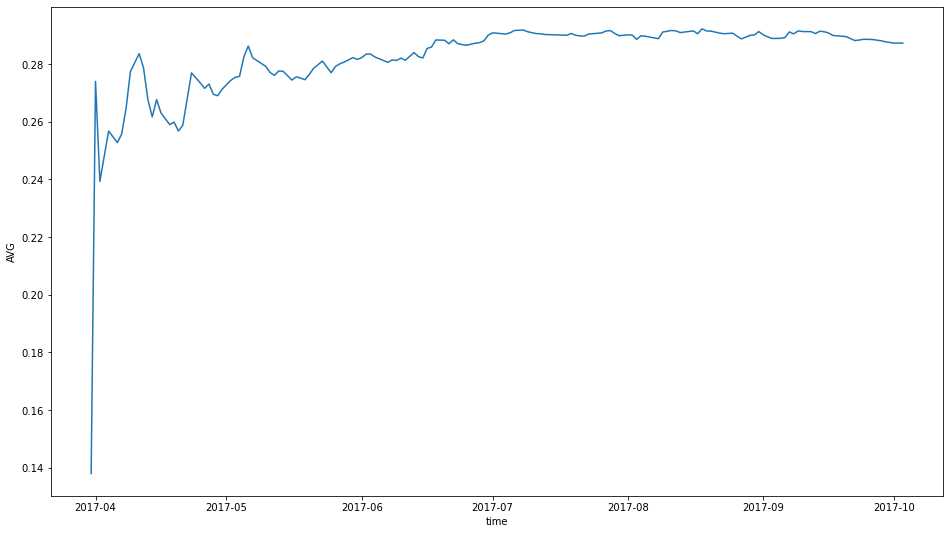

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.lineplot( x=HH_accum17['일자'], y=HH_accum17['타율'])
plt.xlabel('time')
plt.ylabel('AVG')
plt.show()

In [14]:
for i in year:
    for j in team:
        per_fit(globals()['{0}_accum{1}'.format(j,i)])
        scale(globals()['{0}_accum{1}'.format(j,i)])

In [15]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율,일자
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.829787,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.137931,0.000000,2017-03-31
1,0.750000,0.750000,0.607500,0.570423,0.915254,0.535270,0.000000,0.453704,0.000000,0.342105,...,0.829787,0.000000,0.566667,0.794118,1.000000,0.543578,0.012821,0.273973,0.125000,2017-04-01
2,1.000000,1.000000,0.675000,0.633803,0.813559,0.535270,0.777778,0.604938,1.000000,0.122807,...,1.000000,0.000000,0.518519,1.000000,0.958333,0.603976,0.017751,0.239316,0.142857,2017-04-02
3,0.821429,0.800000,0.810000,0.760563,0.838983,0.802905,0.583333,0.680556,0.750000,0.342105,...,0.574468,0.500000,0.422222,0.794118,0.968750,0.724771,0.023669,0.256757,0.170213,2017-04-04
4,0.714286,0.740000,0.729000,0.684507,0.793220,0.749378,0.466667,0.725926,0.600000,0.210526,...,0.523404,0.800000,0.364444,0.705882,0.850000,0.652294,0.029586,0.252747,0.166667,2017-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.447959,0.583571,0.969107,0.980584,0.920702,0.986426,0.250000,0.933333,0.685714,0.097744,...,0.191489,0.771429,0.003333,0.255882,0.634821,0.968087,0.970414,0.288087,0.294256,2017-09-28
140,0.446302,0.582979,0.965106,0.976326,0.918500,0.979430,0.264775,0.939585,0.680851,0.094811,...,0.203259,0.773050,0.004255,0.255319,0.632092,0.961221,0.975345,0.287721,0.292874,2017-09-29
141,0.445171,0.580986,0.958310,0.970790,0.916328,0.976302,0.262911,0.932968,0.676056,0.091920,...,0.211268,0.788732,0.007199,0.257249,0.630282,0.954451,0.982249,0.287477,0.291277,2017-09-30
142,0.445055,0.581119,0.957273,0.969319,0.915254,0.969475,0.261072,0.939135,0.671329,0.089069,...,0.201309,0.783217,0.006061,0.257919,0.626748,0.947777,0.989152,0.287264,0.290147,2017-10-01


팀 데이터로 병합

In [16]:
for i in team:
    for j in year:
        if j == 16:
            pass
        elif j == 17:   
            globals()['df_{}'.format(i)] = pd.concat([globals()['{0}_accum{1}'.format(i,j-1)],
                                                             globals()['{0}_accum{1}'.format(i,j)]])
        else:
            globals()['df_{}'.format(i)] = pd.concat([globals()['df_{}'.format(i)],globals()['{0}_accum{1}'.format(i,j)]])

In [17]:
df_HH[143:160]

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율,일자
143,0.106460,0.120445,0.718468,0.699359,0.349456,0.104745,0.804688,0.944591,0.763889,0.527778,...,0.231481,0.368333,0.020833,0.033221,0.187088,0.339773,1.000000,0.289293,0.300853,2016-10-08
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.829787,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.137931,0.000000,2017-03-31
1,0.750000,0.750000,0.607500,0.570423,0.915254,0.535270,0.000000,0.453704,0.000000,0.342105,...,0.829787,0.000000,0.566667,0.794118,1.000000,0.543578,0.012821,0.273973,0.125000,2017-04-01
2,1.000000,1.000000,0.675000,0.633803,0.813559,0.535270,0.777778,0.604938,1.000000,0.122807,...,1.000000,0.000000,0.518519,1.000000,0.958333,0.603976,0.017751,0.239316,0.142857,2017-04-02
3,0.821429,0.800000,0.810000,0.760563,0.838983,0.802905,0.583333,0.680556,0.750000,0.342105,...,0.574468,0.500000,0.422222,0.794118,0.968750,0.724771,0.023669,0.256757,0.170213,2017-04-04
4,0.714286,0.740000,0.729000,0.684507,0.793220,0.749378,0.466667,0.725926,0.600000,0.210526,...,0.523404,0.800000,0.364444,0.705882,0.850000,0.652294,0.029586,0.252747,0.166667,2017-04-06
5,0.654762,0.750000,0.675000,0.633803,0.813559,0.802905,0.777778,0.604938,0.500000,0.122807,...,0.148936,0.833333,0.277778,0.676471,0.791667,0.543578,0.036489,0.255708,0.145161,2017-04-07
6,0.653061,0.771429,0.694286,0.651911,0.871671,0.841138,1.000000,0.518519,0.428571,0.060150,...,0.173252,0.857143,0.215873,0.705882,0.839286,0.673001,0.045365,0.264591,0.173333,2017-04-08
7,0.607143,0.750000,0.658125,0.617958,0.934322,0.735996,0.875000,0.453704,0.375000,0.342105,...,0.000000,0.875000,0.169444,0.661765,0.796875,0.634174,0.058185,0.277397,0.168675,2017-04-09
8,0.674603,0.822222,0.832500,0.781690,1.000000,0.713693,0.777778,0.504115,0.500000,0.269006,...,0.035461,0.777778,0.197531,0.647059,0.819444,0.845566,0.070020,0.283582,0.221053,2017-04-11


### data 저장

In [18]:
for i in team:
    globals()['df_{}'.format(i)].to_csv("./tbat/{0}_tbat.csv".format(i))

###  훈련 데이터, 모델 설정

타율을 label로 설정

In [19]:
TEST_SIZE = 64

In [20]:
train = df_HH[:-TEST_SIZE]
test = df_HH[-TEST_SIZE:]

In [21]:
# 데이터를 묶어서 처리하는 함수
def make_dateset(data, label, window_size=10):
    import numpy as np
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [22]:
feature_cols = df_HH.columns[:-3]
label_cols = ['타율']

In [23]:
train_feature, train_label = make_dateset(train[feature_cols], train[label_cols],24)
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size=0.1)

In [25]:
x_train.shape, x_valid.shape, test_feature.shape

((497, 24, 22), (56, 24, 22), (40, 24, 22))

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM

In [27]:
model = Sequential()

In [28]:
model.add(LSTM(20, activation='relu',
              input_shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(Dense(1))

In [29]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [31]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=16,
                validation_data=(x_valid, y_valid), callbacks=[early_stop])

Train on 497 samples, validate on 56 samples
Epoch 1/200
497/497 [==============================] - 3s 5ms/sample - loss: 0.0846 - mae: 0.2004 - val_loss: 0.0037 - val_mae: 0.0542
Epoch 2/200
497/497 [==============================] - 1s 1ms/sample - loss: 0.0029 - mae: 0.0436 - val_loss: 0.0018 - val_mae: 0.0316
Epoch 3/200
497/497 [==============================] - 0s 929us/sample - loss: 8.4947e-04 - mae: 0.0218 - val_loss: 6.2387e-04 - val_mae: 0.0191
Epoch 4/200
497/497 [==============================] - 0s 909us/sample - loss: 5.7740e-04 - mae: 0.0172 - val_loss: 4.0044e-04 - val_mae: 0.0156
Epoch 5/200
497/497 [==============================] - 1s 1ms/sample - loss: 4.4935e-04 - mae: 0.0146 - val_loss: 3.5026e-04 - val_mae: 0.0146
Epoch 6/200
497/497 [==============================] - 0s 941us/sample - loss: 3.9662e-04 - mae: 0.0133 - val_loss: 2.5627e-04 - val_mae: 0.0120
Epoch 7/200
497/497 [==============================] - 1s 1ms/sample - loss: 3.5181e-04 - mae: 0.0123 - val

In [32]:
pred = model.predict(test_feature)

In [33]:
model.evaluate(test_feature, test_label)

40/40 [==============================] - 0s 224us/sample - loss: 0.0033 - mae: 0.0529


[0.0032697129994630814, 0.052905846]

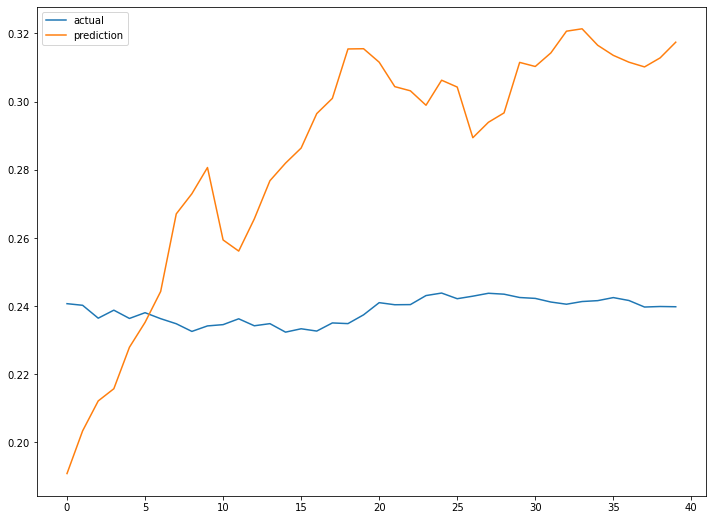

In [34]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()